# Part #3

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from nltk.stem import SnowballStemmer
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob import Blobber
import time


## Use AFINN wordlist to calculate the sentiment values

In [2]:
afinn = {line.strip().split('\t')[0]: int(line.strip().split('\t')[1])
         for line in open('/Users/px/Desktop/AFINN/AFINN-111.txt')}
tag = ['tweets_#gohawks', 'tweets_#gopatriots',
       'tweets_#nfl', 'tweets_#patriots',
       'tweets_#sb49', 'tweets_#superbowl']
# tag = ['tweets_#nfl']


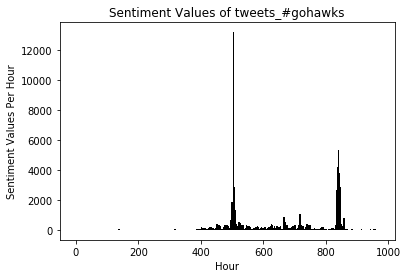

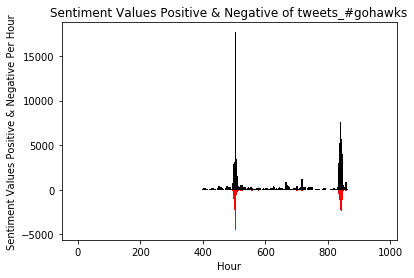

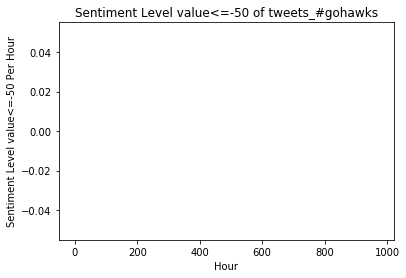

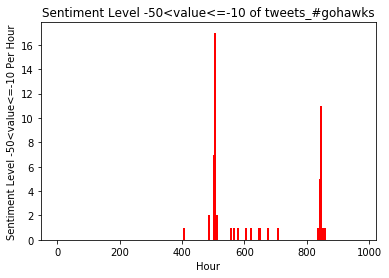

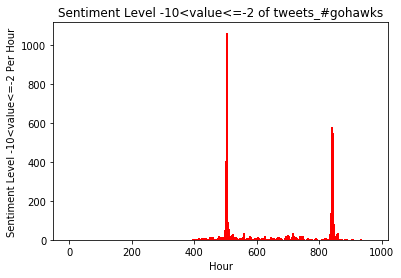

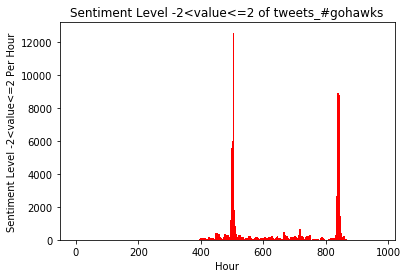

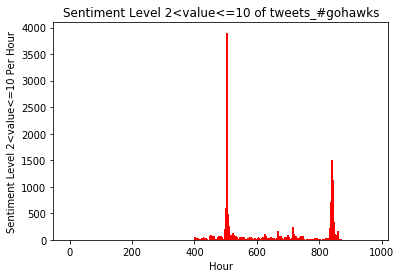

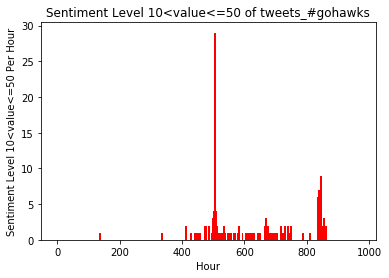

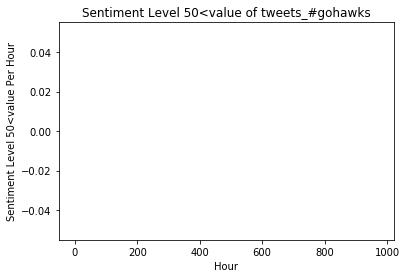

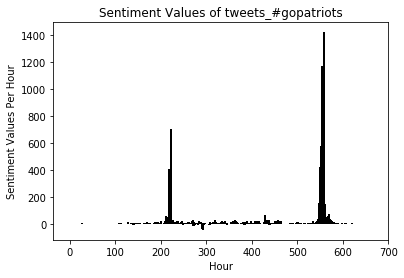

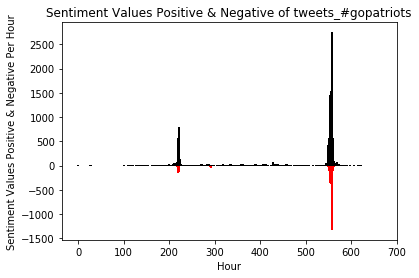

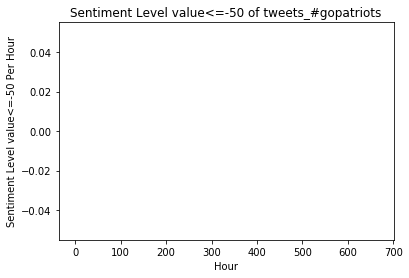

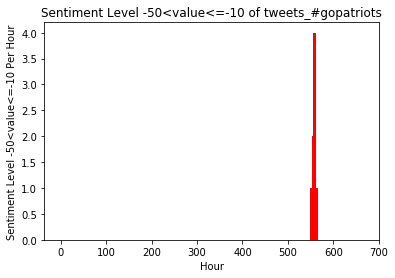

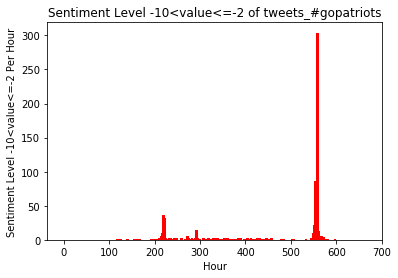

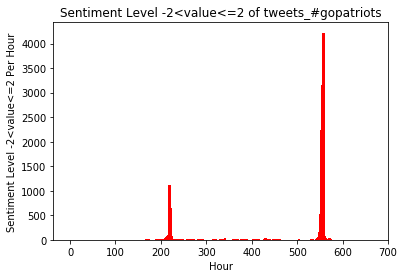

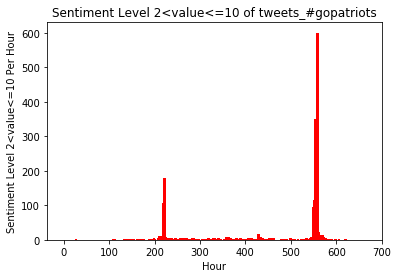

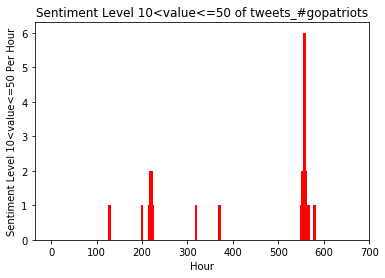

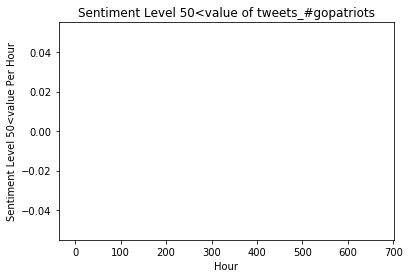

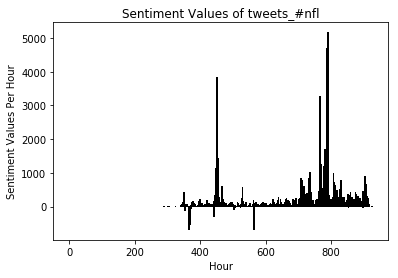

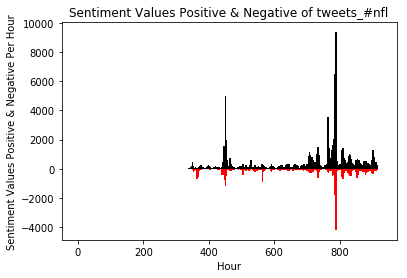

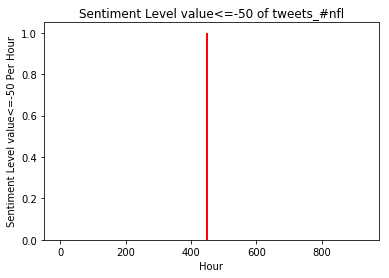

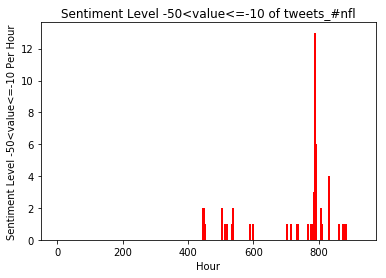

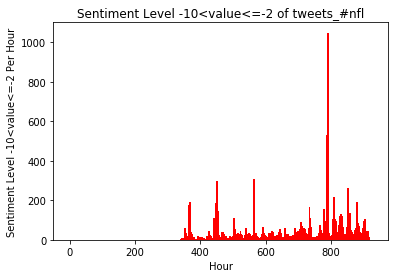

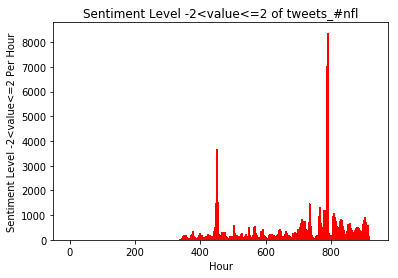

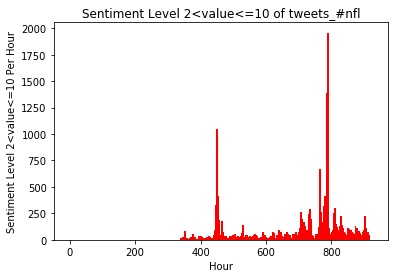

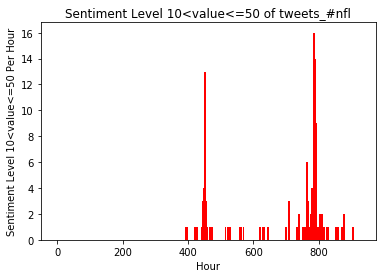

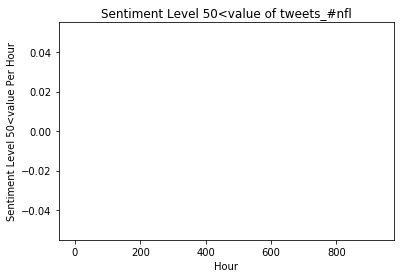

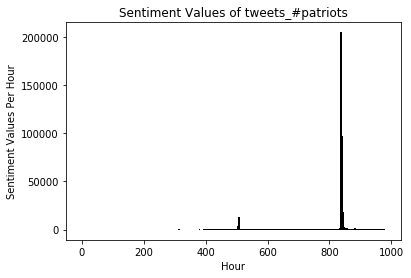

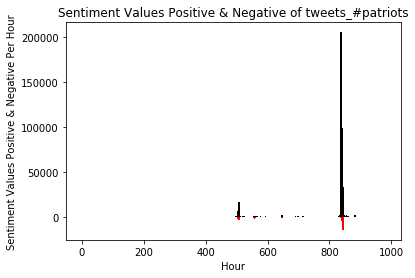

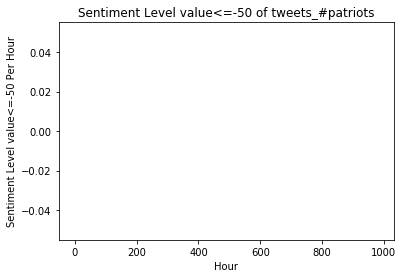

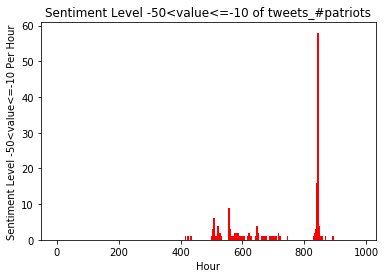

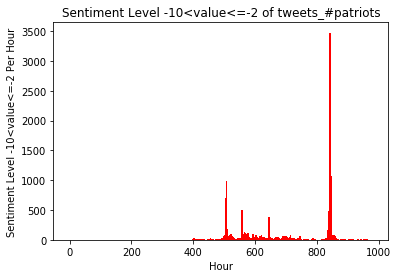

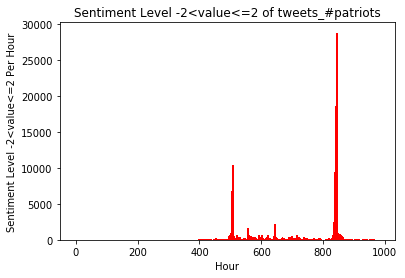

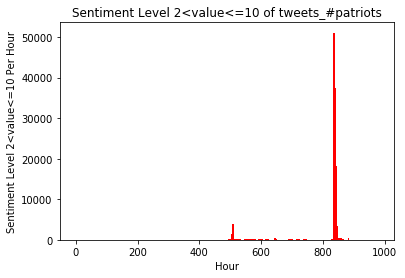

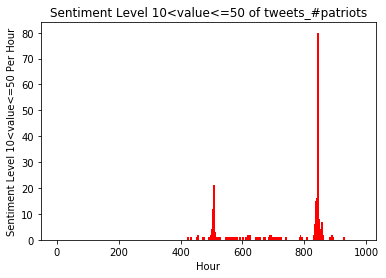

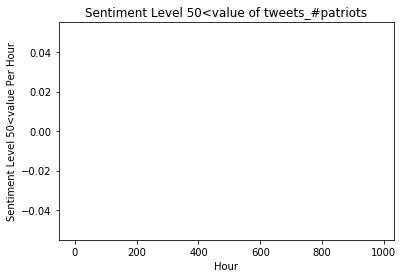

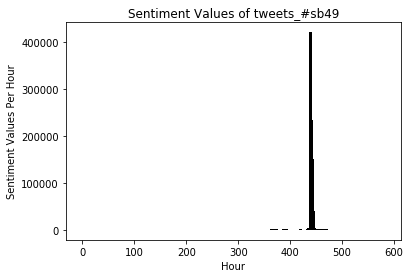

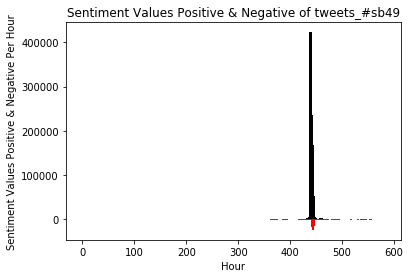

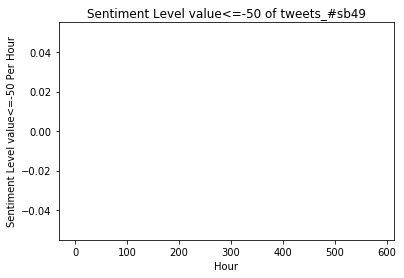

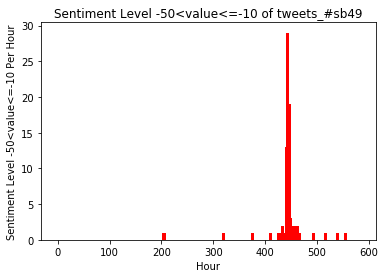

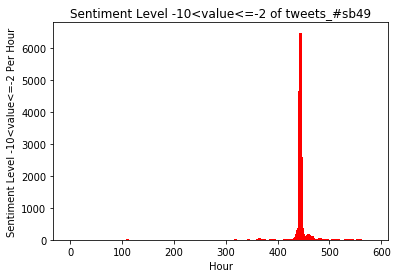

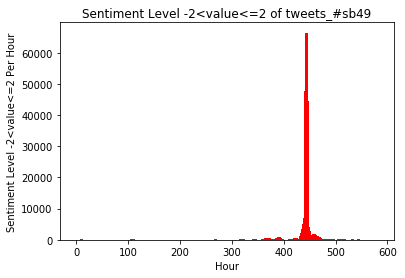

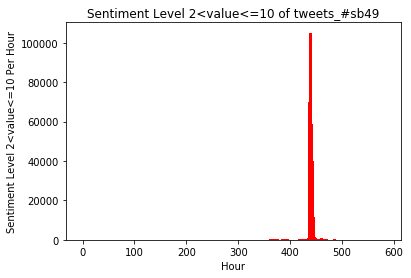

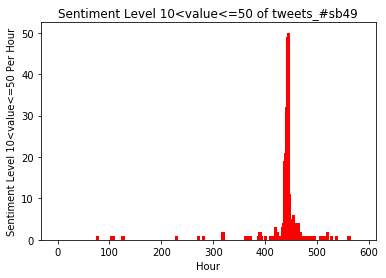

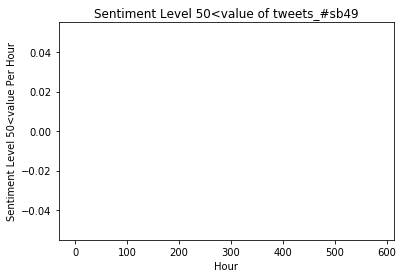

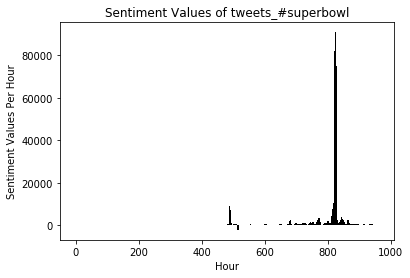

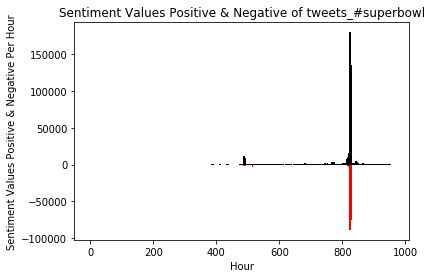

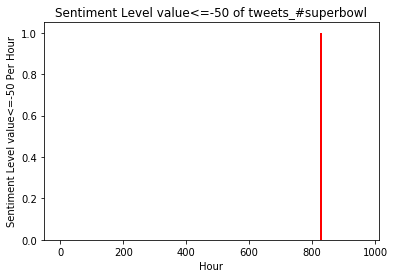

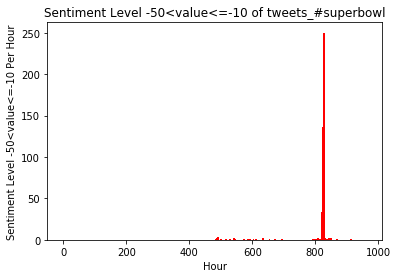

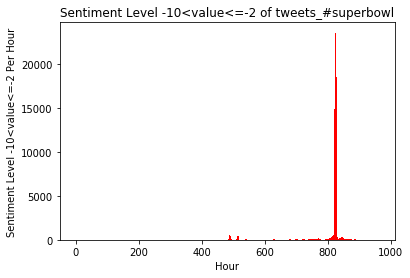

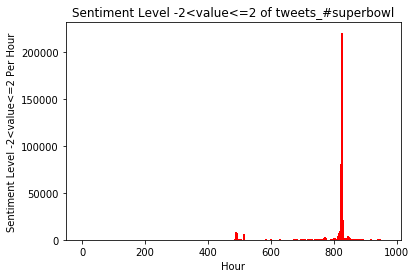

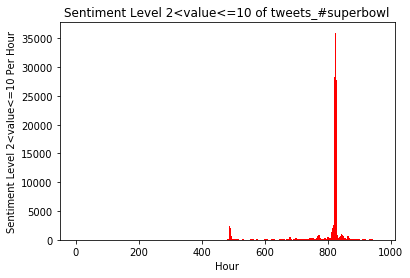

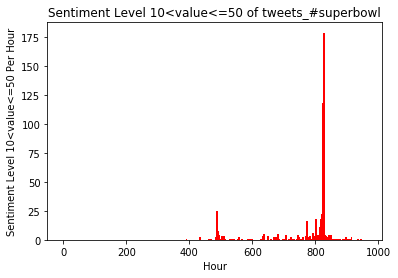

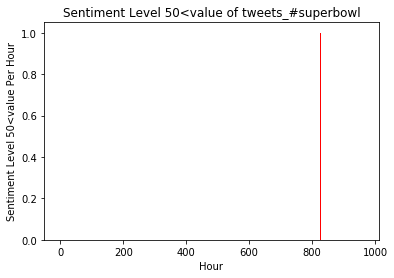

Runtime: 745.9249s


In [3]:
start = time.clock()
for tagname in tag:
    f = open('/Users/px/Desktop/tweet_data/' + tagname + '.txt', 'rb')

    tweet_0 = json.loads(f.readline()) 
    start_time = tweet_0['firstpost_date']
    f.seek(0,0)
    
    stmt_values = list()
    hour_num = list()

    for line in f:
        tweet = json.loads(line)
        end_time = tweet['firstpost_date']
        hour_count = int((end_time - start_time)/3600)
        text = tweet['tweet']['text']
        snowball_stemmer = SnowballStemmer('english')  
        stmt_value = sum(map(lambda word: afinn.get(snowball_stemmer.stem(word), 0), text.lower().split()))
        hour_num.append(hour_count)
        stmt_values.append(stmt_value)

    sentiment_values_per_hour = dict()
    values = list()
    hour_former = 0
    index = 0
    
    while index < len(hour_num):
        hour = hour_num[index]
        if hour == hour_former:
            values.append(stmt_values[index])
            index += 1
        else:
            sentiment_value = dict()
            for item in values:
                sentiment_value[item] = sentiment_value.get(item, 0) + 1
            sentiment_values_per_hour[hour_former] = sentiment_value
            hour_former = hour
            values = list()
    
    # plot the sentiment values per hour
    sum_per_hour = dict()
    for a in sentiment_values_per_hour:
        sum_value = 0
        for b in sentiment_values_per_hour[a]:
            sum_value += b * sentiment_values_per_hour[a][b]
        sum_per_hour[a] = sum_value
    plt.figure()
    plt.bar(sum_per_hour.keys(), sum_per_hour.values(), width = 5, color = 'black')
    plt.xlabel('Hour')
    plt.ylabel('Sentiment Values Per Hour')
    plt.title('Sentiment Values of ' + tagname)
    plt.savefig('/Users/px/Desktop/values/Sentiment Values of' + tagname)
    plt.show()
    
    
    # plot the sentiment positive & negative values per hour
    sum_per_hour_p = dict()
    sum_per_hour_n = dict()
    for a in sentiment_values_per_hour:
        sum_value_p = 0
        sum_value_n = 0
        for b in sentiment_values_per_hour[a]:
            if b > 0:
                sum_value_p += b * sentiment_values_per_hour[a][b]
            elif b < 0:
                sum_value_n += b * sentiment_values_per_hour[a][b]
        sum_per_hour_p[a] = sum_value_p
        sum_per_hour_n[a] = sum_value_n

    plt.figure()
    plt.bar(sum_per_hour_p.keys(), sum_per_hour_p.values(), width = 5, color = 'black')
    plt.bar(sum_per_hour_n.keys(), sum_per_hour_n.values(), width = 5, color = 'red')
    plt.xlabel('Hour')
    plt.ylabel('Sentiment Values Positive & Negative Per Hour')
    plt.title('Sentiment Values Positive & Negative of ' + tagname)
    plt.savefig('/Users/px/Desktop/pos&neg values/Sentiment Positive & Negative Values of ' + tagname)
    plt.show()
    
    # plot the sentiment levels per hour
    levels = [{}, {}, {}, {}, {}, {}, {}]
    for key in sentiment_values_per_hour:
        item = sentiment_values_per_hour[key]
        count = [0, 0, 0, 0, 0, 0, 0]
        for stmt in item:
            if stmt <= -50:
                count[0] += item[stmt] 
            elif stmt > -50 and stmt <= -10:
                count[1] += item[stmt] 
            elif stmt > -10 and stmt <= -2:
                count[2] += item[stmt] 
            elif stmt > -2 and stmt <= 2:
                count[3] += item[stmt] 
            elif stmt > 2 and stmt <= 10:
                count[4] += item[stmt] 
            elif stmt > 10 and stmt <= 50:
                count[5] += item[stmt] 
            elif stmt > 50:
                count[6] += item[stmt] 
        for i in range(len(count)):
            levels[i][key] = count[i]

    def plt_bar(num, data, title):
        plt.bar(num, data, width = 6, color = 'red')
        plt.xlabel('Hour')
        plt.ylabel('Sentiment Level ' + title + ' Per Hour')
        plt.title('Sentiment Level ' + title + ' of ' + tagname)
        plt.savefig('/Users/px/Desktop/levels/Sentiment Levels ' + title + ' of ' + tagname)
        plt.show()

    plt_bar(levels[0].keys(), levels[0].values(), 'value<=-50')
    plt_bar(levels[1].keys(), levels[1].values(), '-50<value<=-10')
    plt_bar(levels[2].keys(), levels[2].values(), '-10<value<=-2')
    plt_bar(levels[3].keys(), levels[3].values(), '-2<value<=2')
    plt_bar(levels[4].keys(), levels[4].values(), '2<value<=10')
    plt_bar(levels[5].keys(), levels[5].values(), '10<value<=50')
    plt_bar(levels[6].keys(), levels[6].values(), '50<value')

end = time.clock()
print('Runtime: %.4fs'%(end - start))

## Use TextBlob to calculate the sentiment values

In [4]:
tag = ['tweets_#gohawks', 'tweets_#gopatriots', 'tweets_#nfl', 'tweets_#patriots', 'tweets_#sb49', 'tweets_#superbowl']


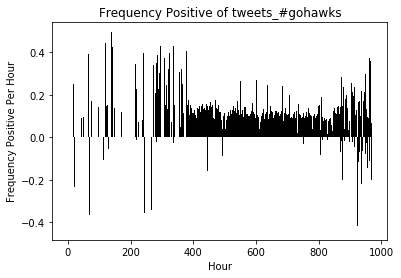

Runtime: 88.5104s


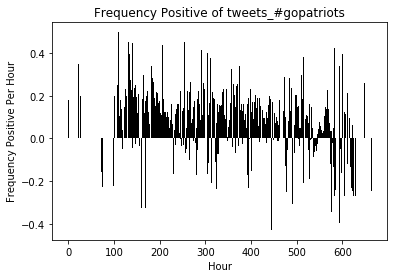

Runtime: 11.3044s


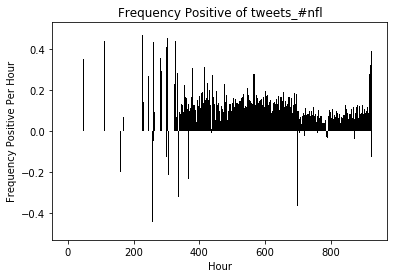

Runtime: 112.7310s


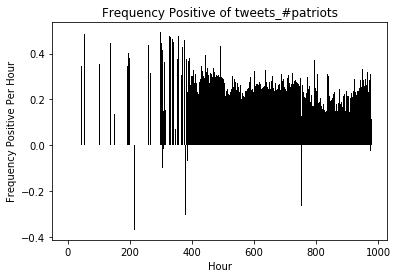

Runtime: 214.9524s


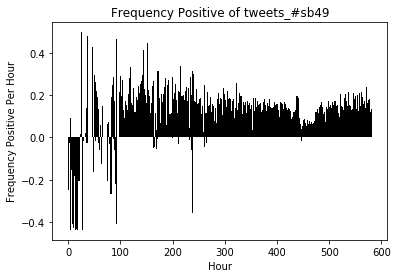

Runtime: 358.3205s


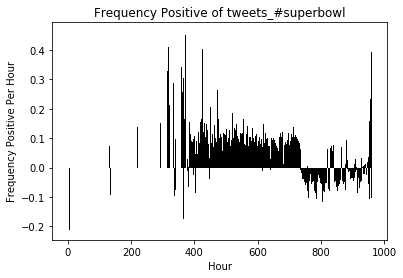

Runtime: 566.1424s


In [5]:
tb = Blobber(analyzer=NaiveBayesAnalyzer())
for tagname in tag:
    start = time.clock()
    f = open('/Users/px/Desktop/tweet_data/' + tagname + '.txt', 'rb')

    tweet_0 = json.loads(f.readline()) 
    start_time = tweet_0['firstpost_date']
    f.seek(0,0)
    
    probs_pos = list()
    hour_num = list()
    

    for line in f:
        tweet = json.loads(line)
        end_time = tweet['firstpost_date']
        hour_count = int((end_time - start_time)/3600)
        text = tweet['tweet']['text']
        prob_pos = tb(text).sentiment.p_pos
        hour_num.append(hour_count)
        probs_pos.append(prob_pos)
    
    probs_per_hour = dict()
    probs = list()
    hour_former = 0
    index = 0
    count = 0

    while index < len(hour_num):
        hour = hour_num[index]
        if hour == hour_former:
            probs.append(probs_pos[index])
            index += 1
            count += 1

        else:
            freq_pos = sum(probs)/count
            probs_per_hour[hour_former] = freq_pos-0.5
            hour_former = hour
            probs = list()
            count = 0
    
    
    plt.figure()
    plt.bar(probs_per_hour.keys(), probs_per_hour.values(), width = 2, color = 'black')
    plt.xlabel('Hour')
    plt.ylabel('Frequency Positive Per Hour')
    plt.title('Frequency Positive of ' + tagname)
    plt.savefig('/Users/px/Desktop/freq/Frequency Positive of ' + tagname)
    plt.show()
    
    end = time.clock()
    print('Runtime: %.4fs'%(end - start))

# Use TextBlob to detect the national distribution of the tweeters

In [6]:
start = time.clock()

tagname = 'tweets_#nfl'
f = open('/Users/px/Desktop/tweet_data/' + tagname + '.txt', 'rb')

tweet_0 = json.loads(f.readline()) 
start_time = tweet_0['firstpost_date']
f.seek(0,0)

languages = list()
hour_num = list()

for line in f:
    tweet = json.loads(line)
    end_time = tweet['firstpost_date']
    hour_count = int((end_time - start_time)/3600)
    text = tweet['tweet']['text']
    language = TextBlob(text).detect_language()
    languages.append(language)
    hour_num.append(hour_count)
#     print(time.localtime(time.time()))
languages_vs_time = dict()
languages_in_one_hour = list()
hour_former = 0
index = 0

while index < len(hour_num):
    hour = hour_num[index]
    if hour == hour_former:
        languages_in_one_hour.append(languages[index])
        index += 1
    else:
        diff_languages = dict()
        for item in languages_in_one_hour:
            diff_languages[item] = diff_languages.get(item, 0) + 1
        languages_vs_time[hour_former] = diff_languages
        hour_former = hour
        languages_in_one_hour = list()
        
end = time.clock()
print('Runtime: %.4fs'%(end - start))

Runtime: 554.9657s


In [20]:
languages_vs_time

{0: {'en': 1},
 21: {'en': 1},
 48: {'en': 1},
 111: {'en': 1},
 137: {'en': 1},
 160: {'en': 3},
 170: {'en': 1},
 213: {'en': 1},
 219: {'en': 1},
 227: {'en': 1},
 230: {'en': 1},
 245: {'en': 1},
 253: {'lv': 1},
 256: {'en': 1},
 257: {'en': 1},
 260: {'en': 2},
 261: {'en': 1, 'es': 1},
 263: {'en': 2},
 264: {'en': 1},
 271: {'en': 1},
 280: {'es': 1},
 281: {'en': 1},
 284: {'en': 1},
 289: {'en': 1},
 300: {'en': 2},
 301: {'en': 1},
 304: {'en': 3},
 305: {'en': 1},
 307: {'en': 1},
 324: {'en': 1},
 326: {'en': 1},
 327: {'en': 1},
 329: {'en': 2},
 331: {'pt': 1},
 332: {'en': 1},
 334: {'en': 2},
 335: {'en': 1},
 337: {'en': 1},
 339: {'en': 21},
 340: {'en': 57, 'es': 1, 'hu': 1},
 341: {'en': 58, 'fr': 1, 'hu': 1, 'no': 1},
 342: {'de': 1, 'en': 53},
 343: {'en': 54, 'it': 1, 'ja': 1},
 344: {'de': 1, 'en': 68, 'es': 1},
 345: {'en': 89, 'it': 1},
 346: {'en': 73, 'fr': 1, 'it': 1, 'pl': 1},
 347: {'ca': 1, 'de': 1, 'en': 177, 'es': 3, 'ja': 1},
 348: {'en': 159, 'es': 

In [119]:
language_distribution = dict()

for key in languages_vs_time:
    for lng in list(languages_vs_time[key].keys()):
        language_distribution[lng] = language_distribution.get(lng, 0) + languages_vs_time[key][lng]
print(language_distribution)
# del language_distribution['en']
# del language_distribution['es']

# language_distribution = dict(sorted(language_distribution.items(),key = lambda x:x[1],reverse = True))
language_distribution  = dict([(k,language_distribution[k]) for k in sorted(language_distribution.keys())])
print(language_distribution)

{'en': 240124, 'lv': 31, 'es': 8381, 'pt': 1852, 'hu': 120, 'fr': 1924, 'no': 152, 'de': 875, 'ja': 1687, 'it': 737, 'pl': 319, 'ca': 222, 'gl': 201, 'fi': 483, 'da': 297, 'sv': 333, 'is': 206, 'ar': 28, 'ru': 207, 'zh-TW': 6, 'cs': 43, 'bg': 6, 'tl': 49, 'th': 16, 'zu': 14, 'uk': 5, 'ig': 12, 'fy': 31, 'mg': 11, 'id': 28, 'sr': 5, 'nl': 101, 'sl': 64, 'tr': 56, 'af': 30, 'hr': 18, 'sk': 16, 'bs': 9, 'ko': 39, 'et': 7, 'lb': 13, 'so': 10, 'zh-CN': 9, 'jw': 6, 'xh': 1, 'cy': 10, 'ht': 13, 'sq': 5, 'ro': 17, 'su': 4, 'az': 4, 'mi': 11, 'lt': 4, 'eu': 18, 'haw': 7, 'ga': 2, 'st': 30, 'el': 42, 'ceb': 7, 'ku': 5, 'la': 4, 'hmn': 10, 'sw': 2, 'hi': 5, 'yo': 2, 'mt': 4, 'mk': 1, 'vi': 2, 'co': 7, 'eo': 4, 'ny': 1, 'mn': 1, 'ta': 1, 'gd': 3, 'sn': 7, 'iw': 2, 'ha': 1}
{'af': 30, 'ar': 28, 'az': 4, 'bg': 6, 'bs': 9, 'ca': 222, 'ceb': 7, 'co': 7, 'cs': 43, 'cy': 10, 'da': 297, 'de': 875, 'el': 42, 'en': 240124, 'eo': 4, 'es': 8381, 'et': 7, 'eu': 18, 'fi': 483, 'fr': 1924, 'fy': 31, 'ga': 2, 'g

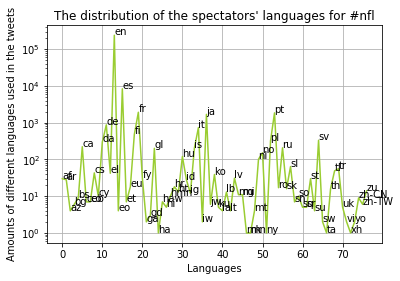

In [121]:
plt.plot(range(len(language_distribution.keys())), language_distribution.values(), color = 'yellowgreen')
plt.xlabel('Languages')
# plt.xticks(range(len(language_distribution.keys())),language_distribution.keys())
for x in range(len(language_distribution.keys())):
    y = list(language_distribution.values())[x]
    content = list(language_distribution.keys())[x]
    plt.text(x, y, content, color = 'black')
plt.grid('True')
plt.ylabel('Amounts of different languages used in the tweets')
plt.yscale('log')
plt.title('The distribution of the spectators\' languages for #nfl')
plt.savefig('/Users/px/Desktop/language/distribution of the spectators\' languages for #nfl')
plt.show()